In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
train = pd.read_csv('../data/train_xy.csv')

In [3]:
test = pd.read_csv('../data/test_all.csv')

In [4]:
train.head()

﻿cust_id cust_group  y       x_1       x_2  x_3  x_4  x_5  x_6  x_7  ...    \
0    110000    group_3  0  0.354167  0.604988  -99  -99  -99  -99  -99  ...     
1    110001    group_3  0  0.125000  0.012058  -99  -99  -99  -99  -99  ...     
2    110002    group_3  0  0.333333  0.565979    0    0    0    0    0  ...     
3    110003    group_3  0  0.208333  0.316209    0    0    0    0    1  ...     
4    110004    group_3  0  0.208333  0.008061  -99  -99  -99  -99  -99  ...     

   x_148  x_149  x_150  x_151  x_152  x_153  x_154  x_155  x_156  x_157  
0      1      1      1      1      1      1      1      1      3    -99  
1      1      1      1      1      1      1      1      1      2      2  
2      1      1      2      1      1      1      1      1      2      2  
3      2      1      1      1      1      1      1      1      2      4  
4      1      1      1      1      1      1      1      1      2      1  

[5 rows x 160 columns]

In [5]:
train.shape

(15000, 160)

In [6]:
test.head()

cust_id cust_group       x_1       x_2  x_3  x_4  x_5  x_6  x_7  x_8  \
0        1    group_1  0.291667  0.555388  -99  -99  -99  -99  -99  -99   
1        2    group_3  0.270833  0.770302    0    0    0    0    1    1   
2        3    group_3  0.354167  0.440327    0    0    0    0    4    3   
3        4    group_1  0.208333  0.476509    0    0    0    0    1    1   
4        5    group_1  0.125000  0.955286    0    0    0    0    2    1   

   ...    x_148  x_149  x_150  x_151  x_152  x_153  x_154  x_155  x_156  x_157  
0  ...        1      1      1      1      1      1      2      2      2      3  
1  ...        1      1      1      1      1      1      2      2      1     10  
2  ...        1      1      1      1      1      1      1      1      3      3  
3  ...        1      1      1      1      1      1      1      1      1      4  
4  ...        1      1      1      1      1      1      1      1      1     10  

[5 rows x 159 columns]

In [7]:
x_train = train.drop(['cust_group','y','\ufeffcust_id'],axis =1)

In [8]:
x_test = test.drop(['cust_group','cust_id'],axis=1)

In [9]:
x_train.shape

(15000, 157)

In [10]:
x_test.shape

(10000, 157)

In [11]:
x = pd.concat([x_train,x_test])
x.shape

(25000, 157)

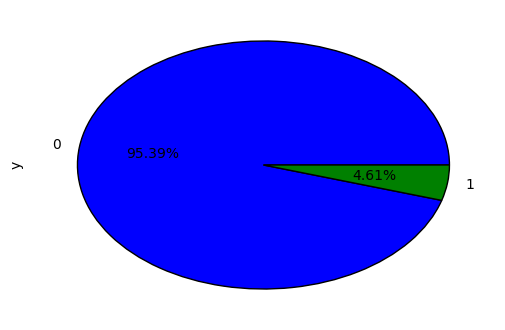

In [12]:
train['y'].value_counts().plot.pie(autopct = '%1.2f%%')

In [13]:
y_train = train['y']

In [14]:
for i in range(96,158):
    col = 'x'+'_'+str(i)
    dummies_df = pd.get_dummies(x[col]).rename(columns=lambda x: col + str(x))
    x = pd.concat([x, dummies_df], axis=1)

In [15]:
x.head()

x_1       x_2  x_3  x_4  x_5  x_6  x_7  x_8  x_9  x_10   ...     \
0  0.354167  0.604988  -99  -99  -99  -99  -99  -99  -99   -99   ...      
1  0.125000  0.012058  -99  -99  -99  -99  -99  -99  -99   -99   ...      
2  0.333333  0.565979    0    0    0    0    0    0    0     0   ...      
3  0.208333  0.316209    0    0    0    0    1    1    0     0   ...      
4  0.208333  0.008061  -99  -99  -99  -99  -99  -99    0     1   ...      

   x_1561  x_1562  x_1563  x_157-99  x_1571  x_1572  x_1573  x_1574  x_15710  \
0     0.0     0.0     1.0       1.0     0.0     0.0     0.0     0.0      0.0   
1     0.0     1.0     0.0       0.0     0.0     1.0     0.0     0.0      0.0   
2     0.0     1.0     0.0       0.0     0.0     1.0     0.0     0.0      0.0   
3     0.0     1.0     0.0       0.0     0.0     0.0     0.0     1.0      0.0   
4     0.0     1.0     0.0       0.0     1.0     0.0     0.0     0.0      0.0   

   x_15711  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  

[5 rows x 355 columns]

In [16]:
train_X = x[0:15000]
test_X = x[15000:25000]
print(train_X.shape)
print(test_X.shape)

(15000, 355)
(10000, 355)


In [17]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [18]:
X_train,X_val,y_train,y_val= train_test_split(train_X,y_train,test_size=0.2,random_state=2)

In [19]:
gbm = XGBClassifier( n_estimators= 100, max_depth= 4, min_child_weight= 2, gamma=0.9, subsample=0.8, 
                        colsample_bytree=0.8, objective= 'binary:logistic', nthread= -1, scale_pos_weight=1).fit(X_train, y_train)

In [20]:
predictions = gbm.predict_proba(X_val)
pre = predictions[:,1]
val_auc = metrics.roc_auc_score(y_val,pre)#验证集上的auc值
print(val_auc)

0.80642048092


In [21]:
preds = gbm.predict_proba(test_X)
pred = preds[:,1]
pred.shape

(10000,)

In [22]:
Submission = pd.DataFrame({'cust_id': test['cust_id'], 'pred_prob': pred})
Submission.to_csv('../result/Submission.csv',index=False)